## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 5: Differential Equations

## Due November 14, 2021 by 11:59 PM
### <span style="color: red">Sarah Storer</span>

Copyright &copy; 2021, University of Washington

### 1. Taylor Approxmations

Use `sympy` to find the Taylor Approximations to $\sin x$ with 1 term, 2 terms, 3 terms, all the way up to 6 terms.
Ignore the remainder term. Plot all of these approximations along with $\sin x$ on the same plot, showing the 
approximations get better and better. 

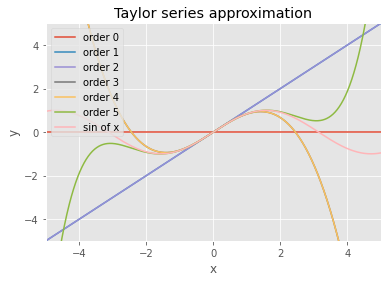

In [9]:
import sympy as sy
import numpy as np
from sympy.functions import sin
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# Define the variable and the function to approximate
x = sy.Symbol('x')
f = sin(x)

# Taylor approximation at x0 of the function 'function'
def taylor(function,x0,n):
    i = 0
    p = 0
    while i <= n:
        p = p + (function.diff(x,i).subs(x,x0))/np.math.factorial(i)*(x-x0)**i
        i += 1
    return p

def plot():
    x1 = np.linspace(-5,5,800)
    y1 = []
    # Approximate up until 10 starting from 1 and using steps of 2
    for j in range(6):
        func = taylor(f,0,j)
        for k in x1:
            y1.append(func.subs(x,k))
        plt.plot(x1,y1,label='order '+str(j))
        y1 = []
    # Plot the function to approximate (sine, in this case)
    plt.plot(x1,np.sin(x1),label='sin of x')
    plt.xlim([-5,5])
    plt.ylim([-5,5])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title('Taylor series approximation')
    plt.show()

plot()

### 2. Showing Inequalities With Taylor's Approximation.

Show that if $x>0$ then $1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq \sqrt{1+x} \leq 1 + \frac{1}{2}x$. 

Hint: break this into two steps, one for each inequality. For the first step, use the first three terms of the Taylor approximation and a residual term that is cubic. For the second inequality, use the first two terms of the Taylor approximation and a residual term that is a square. Make sure to explain each step of your argument.

How good is this approximation for $\sqrt{2}$? How about $\sqrt{3}$? 

Visualize this problem by making a plot showing the relationship of the three expressions as $x$ increases.

We can use Taylor’s theorem to derive an approximation for some $c$
with $x < c < x_0$ as follows:

$f(x) = f(x_0)+f'(x_0)(x-x_0)+\frac{f''(x_0)}{2!}(x-x_0)^2+\dots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$

The remainder formula for Taylor Polynomials is as follows:

$|R_n| = |\frac{f^{(n+1)}(c)}{(n+1)!}(x-a)^{(n+1)}|$

Let $f(x) = 1 + \frac{1}{2}x - \frac{1}{8}x^2$ and $g(x) = 1 + \frac{1}{2}x$

$\sqrt{1+x}$ can be expanded as:

$1 + \frac{1}{2}x - \frac{1}{8}x^2 + |\frac{f^{(3)}(c)}{(3)!}(x-x_0)^{(3)}|$

and

$1 + \frac{1}{2}x + |\frac{f^{(2)}(c)}{(2)!}(x-x_0)^{(2)}|$.

Then,

$1 + \frac{1}{2}x - \frac{1}{8}x^2 \leq 1 + \frac{1}{2}x - \frac{1}{8}x^2 + |\frac{f^{(3)}(c)}{(3)!}(x-x_0)^{(3)}|$

$0 \leq |\frac{f^{(3)}(c)}{(3)!}(x-x_0)^{(3)}|$

$0 \leq \frac{3}{48}(1+c)^{-5/2}(x-c)^3$

and

$1 + \frac{1}{2}x + |\frac{f^{(2)}(c)}{(2)!}(x-x_0)^{(2)}| \leq 1 + \frac{1}{2}x $

$ |\frac{f^{(2)}(c)}{(2)!}(x-x_0)^{(2)}| \leq 0$

$ -\frac{1}{8}(1+c)^{-3/2}(x-c)^2 \leq 0$

Therefore, 

$ -\frac{1}{8}(1+c)^{-3/2}(x-c)^2 \leq 0 \leq \frac{3}{48}(1+c)^{-5/2}(x-c)^3$ for $ x < 0$. This is obviously true.

---

For $\sqrt{2}$, using $x=1$ since $\sqrt{1 + 1} = \sqrt{2}$ and using $x_0 = 0$

$1 + \frac{1}{2}(1) - |\frac{f^{(2)}(c)}{(2)!}(x-x_0)^{(2)}|$

$\frac{3}{2} -\frac{1}{8(1)^{\frac{3}{2}}} = ~1.455$

$\sqrt{2} = ~1.414$

This approximation is good for $\sqrt{2}$

---

For $\sqrt{3}$, using $x=2$ since $\sqrt{1 + 2} = \sqrt{3}$ and using $x_0 = 0$

$1 + \frac{1}{2}(2) - \frac{1}{8}(2)^2 + |\frac{f^{(3)}(c)}{(3)!}(x-x_0)^{(3)}|$

$\frac{3}{2} + \frac{3}{48}(1+\sqrt{3})^{-5/2}(2-\sqrt{3})^3 = ~1.500$

$\sqrt{3} = ~1.732$

This approximation is not as good for $\sqrt{3}$




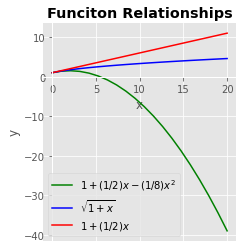

In [15]:
x = np.linspace(0,20,20)

fig = plt.figure(figsize=[20, 4])
ax = fig.add_subplot(1, 5, 1)
ax.spines['left'].set_position(("data", 0))
ax.spines['bottom'].set_position(("data", 0))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.title('Funciton Relationships', fontweight ="bold")
plt.xlabel("x")
plt.ylabel("y");

# plot the function
plt.plot(x, (1 + (1/2)*x - (1/8)*x**2), 'g', label="$1 + (1/2)x - (1/8)x^2$");
plt.plot(x, (1+x)**(1/2), 'b', label="$\sqrt{1+x}$");
plt.plot(x, (1 + (1/2)*x), 'r', label="$1 + (1/2)x$");
plt.legend();
plt.show()

### 3. Equilibria Points and Linearization

For each of the
following systems:
(i) find the equilibria, 
(ii) linearize the system around each equilibrium and find the eigenvalues, and
(iii) state whether the system is stable at each equilibrium.

$$
\mathrm{a)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_2^2 \\
x_1^2
\end{pmatrix}
$$

$$
\mathrm{b)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
x_1^2 + x_2^2 \\
x_2
\end{pmatrix}
$$

$$
\mathrm{c)} \;\; 
\begin{pmatrix}
\dot x_1 \\
\dot x_2
\end{pmatrix} = 
\begin{pmatrix}
\sin x_2 \\
\cos x_1
\end{pmatrix}
$$

### 4. Tuning Eigenvalues

Consider the matrix

$$
A = \begin{pmatrix}
  k & -k \\
  1 & k-1 \\
\end{pmatrix}
$$

and the system $\dot x = A x$. Plot the real part of the eigenvalues of $A$ as a function of $k$, for $k$ ranging from -2 to 2. 
For what values of $k$ is the system stable? 

Plot example phase portraits for $A$ when $k$ is in the stable range showing the range of behaviors you can get from tuning $k$. 

$
A =
\begin{pmatrix}
k & -k\\
1 & k-1 \\
\end{pmatrix}
$

$\lvert A - I\lambda \rvert  = 
\begin{pmatrix} 
k - \lambda & -k \\
1 & k - 1 - \lambda \\
\end{pmatrix} $

The characteristic polynomial:

$\lambda^2 + (1-k)\lambda + (k^2 + k) = 0$

Use the quadratic formula to solve for the eigenvalues of $A$.

$ x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}$

$\lambda_1 = \frac{-(1-2k) + \sqrt{(1-2k)^2 - 4(1)(k^2)}}{2(1)} \longrightarrow \lambda_1 = \frac{(2k-1) + \sqrt{1-4k}}{2}$

$\lambda_2 = \frac{-(1-2k) - \sqrt{(1-2k)^2 - 4(1)(k^2)}}{2(1)} \longrightarrow \lambda_2 = \frac{(2k-1) - \sqrt{1-4k}}{2}$

These eigenvalues are concurrent with the solution provided by python below. 

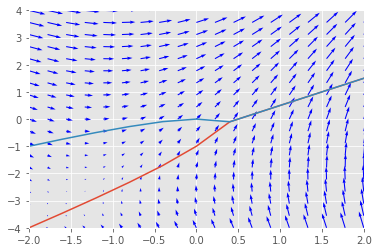

In [141]:
k = sp.Symbol('k')
A = sp.Matrix([[k, -k],[1, k-1]])


Aeig = A.eigenvals()
keys_list = list(Aeig)

k1 = np.linspace(-4,4,21)

lam1 = np.zeros((len(k1), 1), dtype = complex)
lam2 = np.zeros((len(k1), 1), dtype = complex)
for i in range(len(k1)):
    w1 = keys_list[0].subs(k,k1[i])
    w2 = keys_list[1].subs(k,k1[i])
    lam1[i] = w1
    lam2[i] = w2

lam1Real = np.real(lam1)
lam2Real = np.real(lam2)

fig1, ax = plt.subplots()
ax.set_xlim(-2,2)
ax.set_ylim(-4,4)

a1,b1 = (-2,2)
a2,b2 = (-4,4)
x1 = np.linspace(a1, b1, 19)
x2 = np.linspace(a2, b2, 19)
X1,X2 = np.meshgrid(x1,x2)

u,v = np.zeros(X1.shape, dtype = complex), np.zeros(X2.shape, dtype = complex)

n,m = X1.shape
for i in range(n):
  for j in range(m):
    w1 = keys_list[0].subs(k,i)
    w2 = keys_list[1].subs(k,j)
    u[i,j] = np.real(w1)
    v[i,j] = np.real(w2)


Q = plt.quiver(X1, X2, u, v, color='b')

plt.plot(k1, lam1Real)
plt.plot(k1, lam2Real)
plt.show();

### 5. Rotations Again

Let $\dot x = Ax$

$$
A = \begin{pmatrix}
0 & -w_3 & w_2 \\
w_3 & 0 & -w_1 \\
-w_2 & w_1 & 0
\end{pmatrix}
$$

where $w_i \in \mathbb{R}$. 

a) Show that $A$ is **skew symmetric**, meaning that, that $A^T = -A$.

b) Show that all points of the form 

$$
x = a \begin{pmatrix}
w_1 \\
w_2 \\
w_3
\end{pmatrix}
$$

where $a$ is a scalar are equilibrum points. 

c) Choose a few different choices for the $w_i$ and for each choice show example numerical trajectories by plotting the three components of the state $x$ versus time. Also plot the trajectories in the $x_1$ - $x_2$ plane. 

In [143]:
w1, w2, w3 = sp.symbols('w1, w2, w3')
A = sp.Matrix([[0, -w3, w2], [w3, 0, -w1], [-w2, w1, 0]])

if A.T == -1*A:
    print('A^T = -A, skew symmetry')
else:
    print('Not skew symmetric')

A^T = -A, skew symmetry


In [148]:
Aeig = A.eigenvals()
eigvals = list(Aeig)
eigvects = A.eigenvects()
eigvects = list(eigvects)
eigvals, eigvects

([-sqrt(-w1**2 - w2**2 - w3**2), sqrt(-w1**2 - w2**2 - w3**2), 0],
 [(0,
   1,
   [Matrix([
    [w1/w3],
    [w2/w3],
    [    1]])]),
  (-sqrt(-w1**2 - w2**2 - w3**2),
   1,
   [Matrix([
    [-w1*w3/(w1**2 + w2**2) + w2*sqrt(-w1**2 - w2**2 - w3**2)/(w1**2 + w2**2)],
    [-w1*sqrt(-w1**2 - w2**2 - w3**2)/(w1**2 + w2**2) - w2*w3/(w1**2 + w2**2)],
    [                                                                       1]])]),
  (sqrt(-w1**2 - w2**2 - w3**2),
   1,
   [Matrix([
    [-w1*w3/(w1**2 + w2**2) - w2*sqrt(-w1**2 - w2**2 - w3**2)/(w1**2 + w2**2)],
    [ w1*sqrt(-w1**2 - w2**2 - w3**2)/(w1**2 + w2**2) - w2*w3/(w1**2 + w2**2)],
    [                                                                       1]])])])

### 6. Analysis of a Bistable Switch

A genetic bistable switch has the model

$$
\dot u = \frac{\alpha_1}{1 + v^2} - u \\
\dot v = \frac{\alpha_2}{1 + u^2} - v 
$$

where $\alpha_1$ and $\alpha_2$ are the expression rates of the two proteins $u$ and $v$. The behavior of this system is that when one protein is high, the other should be low.

a) Show that when $\alpha_1 = \alpha_2 = \frac{17}{4}$, there are two isolated equilibra corresponding to having one protein be high and the other low. Show that these equilibria are unstable. 

**Note**: You might start this problem by plotting the vector field for this system and finding the equilibria graphically.

b) Find values of $\alpha_1$ and $\alpha_2$ for which there is only equilibrium (assuming positive values for $u$ and $v$). Is this equilibrium stable?

### 7. Simulation 

Using simulation and visualization, explain the behavior of the system

\begin{eqnarray}
\dot x & = & -y - z \\
\dot y & = & x + a y \\
\dot z & = & b + z(x-c)
\end{eqnarray}

where $a=0.2$, $b=0.2$ and $c=5.7$. 

Text(0.5, 0.92, '3D plot of the trajectory')

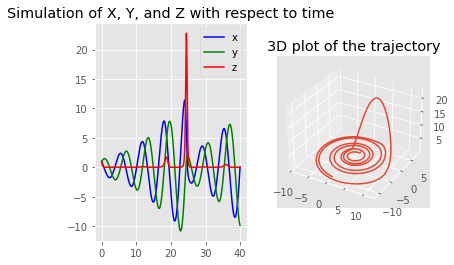

In [67]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

def f_xyz(state, t, a, b, c):
    x, y, z = state
    xp = -y-z
    yp = x + a*y
    zp = b + z*(x-c)
    return [xp, yp, zp]

a = 0.2
b = 0.2
c = 5.7

p = (a, b, c) #parameters of the system
y0 = [1.0, 1.0, 1.0]  # Initial state of the system

t_span = [0.0, 40.0]
t = np.arange(0.0, 40.0, 0.01)

result_odeint = odeint(f_xyz, y0, t, p)
 
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
ax.plot(t, result_odeint[:, 0], color = "b", label="x")
ax.plot(t, result_odeint[:, 1], color = "g", label = "y")
ax.plot(t, result_odeint[:, 2], color = "r", label = "z")
ax.legend()

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
ax2.plot(result_odeint[:, 0],
        result_odeint[:, 1],
        result_odeint[:, 2])
ax.set_title("Simulation of X, Y, and Z with respect to time");
ax2.set_title("3D plot of the trajectory")
